FUNÇÕES DE PERDA

In [ ]:
import torch
from torch import nn

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


Text(0, 0.5, 'color_intensity')

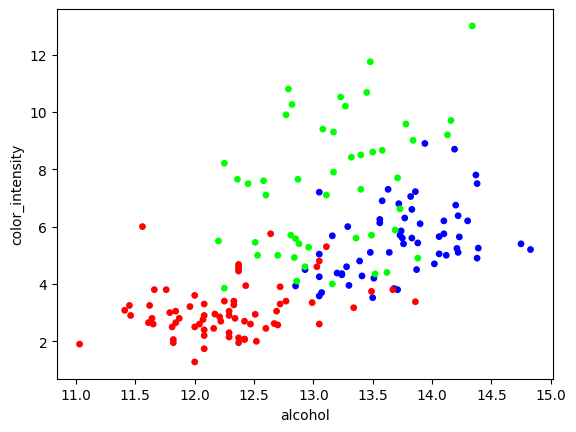

In [ ]:
from sklearn import datasets

wine = datasets.load_wine()
data = wine.data
target = wine.target

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)

INSTANCIANDO UMA MLP

In [ ]:
class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()             # Iniciando a super classe

    self.hidden = nn.Linear(input_size, hidden_size)   #
    self.relu = nn.ReLU()                              # Definindo a arquitetura
    self.out = nn.Linear(hidden_size, out_size)        #
    self.softmax = nn.Softmax()                        #

  def forward(self, X):
    feature = self.relu(self.hidden(X))        # Forward na rede
    output = self.softmax(self.out(feature))   #

    return output

input_size = data.shape[1]          #
hidden_size = 32                    #  Valores da rede
out_size = len(wine.target_names)   #

net = WineClassifier(input_size, hidden_size, out_size).to(device)  # Criando a rede e subindo para gpu

In [ ]:
print(net)

WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


INSTANCIANDO FUNÇÃO DE PERDA

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)   # Função para calcular a entropia cruzada entre a distribuição que vai ser predita e a do rotulo - 1 = correto / 2 = incorreto

Xtns = torch.from_numpy(data).float()  # Transformando os dados em tensor
Ytns = torch.from_numpy(target)        #

Xtns = Xtns.to(device)   # Subindo os tensores na gpu
Ytns = Ytns.to(device)   #

In [ ]:
pred = net(Xtns)

print(pred.shape)

torch.Size([178, 3])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
loss = criterion(pred, Ytns)   # Calculando a perda sem treinar. O valor apresentado é uma media das perdas de todos os dados
print(loss)

tensor(1.2194, device='cuda:0', grad_fn=<NllLossBackward0>)


Regressão

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target


In [ ]:
class WineClassifier(nn.Module):                       # ATENÇÃO: Apesar do nome essas MLP é do dataset de diabetes tendeu !?

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()             # Iniciando a super classe

    self.hidden = nn.Linear(input_size, hidden_size)   #
    self.relu = nn.ReLU()                              # Definindo a arquitetura
    self.out = nn.Linear(hidden_size, out_size)        #
    self.softmax = nn.Softmax()                        #

  def forward(self, X):
    feature = self.relu(self.hidden(X))        # Forward na rede
    output = self.softmax(self.out(feature))   #

    return output

input_size = data.shape[1]          #
hidden_size = 32                    #  Valores da rede
out_size = 1                        #

net = WineClassifier(input_size, hidden_size, out_size).to(device)  # Criando a rede e subindo para gpu

In [ ]:
criterion = nn.MSELoss().to(device)

Xtns = torch.from_numpy(data).float()          # Transformando os dados em tensor
Ytns = torch.from_numpy(target).float()        #

Xtns = Xtns.to(device)   # Subindo os tensores na gpu
Ytns = Ytns.to(device)   #

In [ ]:
pred = net(Xtns)
print(pred.shape)

loss = criterion(pred.squeeze(), Ytns)

torch.Size([442, 1])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
